## Convolutional Autoencoder

In [199]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
# Random Tensor 
# tensor = torch.randn(1, 6, 64, 64)
# tensor.shape

In [201]:
# Load Image

transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize(
            mean=[0.3810, 0.4527, 0.5128],
            std=[0.2663, 0.2693, 0.2771])
])

dataset = datasets.ImageFolder('data', transform=transform)

image, label = next(iter(dataset))

uper_image = image[:, :64, 64:]
left_image = image[:, 64:, :64]

tensor = torch.cat((uper_image, left_image), dim=0).unsqueeze(0)
tensor.shape

torch.Size([1, 6, 64, 64])

In [202]:
# Laten vector
nz = 200

In [203]:
conv1 = nn.Conv2d(in_channels=6, out_channels=64, kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv1(tensor)
tensor = F.leaky_relu(tensor, negative_slope=0.2)
tensor.shape

torch.Size([1, 64, 32, 32])

In [204]:
conv2 = nn.Conv2d(in_channels=64, out_channels=(64 * 2), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv2(tensor)
batch_norm2 = nn.BatchNorm2d(num_features=(64 * 2))
tensor = batch_norm2(tensor)
tensor = F.leaky_relu(tensor, negative_slope=0.2)
tensor.shape

torch.Size([1, 128, 16, 16])

In [205]:
conv3 = nn.Conv2d(in_channels=(64 * 2), out_channels=(64 * 4), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv3(tensor)
batch_norm3 = nn.BatchNorm2d(num_features=(64 * 4))
tensor = batch_norm3(tensor)
tensor = F.leaky_relu(tensor, negative_slope=0.2)
tensor.shape

torch.Size([1, 256, 8, 8])

In [206]:
conv4 = nn.Conv2d(in_channels=(64 * 4), out_channels=(64 * 8), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv4(tensor)
batch_norm4 = nn.BatchNorm2d(num_features=(64 * 8))
tensor = batch_norm4(tensor)
tensor = F.leaky_relu(tensor, negative_slope=0.2)
tensor.shape



torch.Size([1, 512, 4, 4])

In [207]:
conv5 = nn.Conv2d(in_channels=(64 * 8), out_channels=(64 * 16), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv5(tensor)
batch_norm5 = nn.BatchNorm2d(num_features=(64 * 16))
tensor = batch_norm5(tensor)
tensor = F.leaky_relu(tensor, negative_slope=0.2)
tensor.shape


torch.Size([1, 1024, 2, 2])

In [208]:
tensor = torch.flatten(tensor, start_dim=1)
tensor.shape

torch.Size([1, 4096])

In [209]:
fc = nn.Linear(in_features=4096, out_features=nz)
tensor = fc(tensor)
tensor.shape

torch.Size([1, 200])

In [210]:
tensor = tensor.unsqueeze(2).unsqueeze(2)
tensor.shape

torch.Size([1, 200, 1, 1])

In [211]:
d_conv1 = nn.ConvTranspose2d(in_channels=nz, out_channels=(64 * 8), kernel_size=4, stride=1, padding=0, bias=False)
tensor = d_conv1(tensor)
d_batch_norm1 = nn.BatchNorm2d(num_features=(64 * 8))
tensor = d_batch_norm1(tensor)
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 512, 4, 4])

In [212]:
d_conv2 = nn.ConvTranspose2d(in_channels=(64 * 8), out_channels=(64 * 4), kernel_size=4, stride=2, padding=1, bias=False)
tensor = d_conv2(tensor)
d_batch_norm2 = nn.BatchNorm2d(num_features=(64 * 4))
tensor = d_batch_norm2(tensor)
tensor = F.relu(tensor)
tensor.shape




torch.Size([1, 256, 8, 8])

In [213]:
d_conv3 = nn.ConvTranspose2d(in_channels=(64 * 4), out_channels=(64 * 2), kernel_size=4, stride=2, padding=1, bias=False)
tensor = d_conv3(tensor)
d_batch_norm3 = nn.BatchNorm2d(num_features=(64 * 2))
tensor = d_batch_norm3(tensor)
tensor = F.relu(tensor)
tensor.shape




torch.Size([1, 128, 16, 16])

In [214]:
d_conv4 = nn.ConvTranspose2d(in_channels=(64 * 2), out_channels=(64 * 1), kernel_size=4, stride=2, padding=1, bias=False)
tensor = d_conv4(tensor)
d_batch_norm4 = nn.BatchNorm2d(num_features=(64 * 1))
tensor = d_batch_norm4(tensor)
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

In [215]:
d_conv5 = nn.ConvTranspose2d(in_channels=(64 * 1), out_channels=3, kernel_size=4, stride=2, padding=1, bias=False)
tensor = d_conv5(tensor)
tensor = torch.tanh(tensor)
tensor.shape

torch.Size([1, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


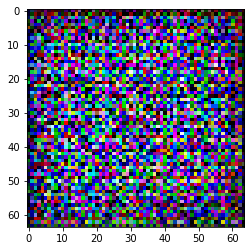

In [216]:
generated_image = tensor.squeeze(0).detach()

plt.imshow(generated_image.permute(1, 2, 0).numpy())

## Example

